In [1]:
from IPython.html.services.config import ConfigManager
from IPython.paths import locate_profile
cm = ConfigManager(profile_dir=locate_profile(get_ipython().profile))

cm.update('notebook', {"load_extensions": {"livereveal/main": True}})
cm.update('livereveal', {
    'theme': 'simple',
    'transition': 'linear',
    'slideNumber': True,
    'start_slideshow_at': 'selected',
    'scroll': True,
})

/Users/gorosz/anaconda3/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


{'scroll': True,
 'slideNumber': True,
 'start_slideshow_at': 'selected',
 'theme': 'simple',
 'transition': 'linear'}

# Mining Hungarian texts

## Who?

* György Orosz
* NLP engineer @ LogMeIn
* [gyorgy@orosz.link](mailto:gyorgy@orosz.link) / http://github.com/oroszgy

![Results1](./img/poll_results1.png)

![Results1](./img/poll_results2.png)

## What?


![](./img/poll_results3.png)

* We are going to focus on freely available NLP tools for Hungarian.
* Practical introduction.

## Agenda

1. Practical NLP in Python: `spaCy` and `textacy` 
2. Describing documents with words
2. Document categorization
3. Sentiment analysis
5. Named entities
6. Wikification, entity linking

## Motivation

* There is not much NLP applied outside academia
* (Until nowadays there was a) Lack of easily usable, open-source Hungarian tools
* Would love encourage everyone to use and build NLP tools
* Promote my pet projects :)

# SpaCy

Industrial-strength Natural Language Processing (NLP) with Python and Cython

![Spacy](./img/spacy.png)

### Industrial ...

* deals with noisy texts
* blazingly fast as it is written in Cython
* multithreading capability (no GIL!)
* convenient API
* easily pluggable to ML pipelines
* multilingual

+1: living open-source community

## 101

In [2]:
from spacy.en import English

nlp = English()

doc = nlp(
    "Trump was born and raised in Queens, New York City, and earned an economics degree from the Wharton School."
    " Later, he took charge of The Trump Organization, the real estate and construction firm founded by his paternal "
    "grandmother, which he ran for 45 years until 2016. During his real estate career, Trump built, "
    "renovated, and managed numerous office towers, hotels, casinos, and golf courses. ")  

In [3]:
len(doc)

78

In [4]:
word = doc[6]
word.text, word.shape_, word.is_title, word.is_stop, word.is_alpha, word.cluster, word.prob, word.suffix_

('Queens', 'Xxxxx', True, False, True, 166, -19.579313278198242, 'ens')

In [5]:
(list(doc.sents))

[Trump was born and raised in Queens, New York City, and earned an economics degree from the Wharton School.,
 Later, he took charge of The Trump Organization, the real estate and construction firm founded by his paternal grandmother, which he ran for 45 years until 2016.,
 During his real estate career, Trump built, renovated, and managed numerous office towers, hotels, casinos, and golf courses.]

In [6]:
sent_0 = next(doc.sents)
print("\n".join(
    ["{}\t{}\t{}\t{}\t{}\t{}".format(tok.i, tok.text, tok.lemma_, tok.pos_, tok.tag_, tok.dep_, tok.head.i)
        for tok in sent_0
]))

0	Trump	trump	PROPN	NNP	nsubjpass
1	was	be	VERB	VBD	auxpass
2	born	bear	VERB	VBN	ROOT
3	and	and	CCONJ	CC	cc
4	raised	raise	VERB	VBN	conj
5	in	in	ADP	IN	prep
6	Queens	queens	PROPN	NNP	pobj
7	,	,	PUNCT	,	punct
8	New	new	PROPN	NNP	compound
9	York	york	PROPN	NNP	compound
10	City	city	PROPN	NNP	conj
11	,	,	PUNCT	,	punct
12	and	and	CCONJ	CC	cc
13	earned	earn	VERB	VBD	conj
14	an	an	DET	DT	det
15	economics	economics	NOUN	NN	compound
16	degree	degree	NOUN	NN	dobj
17	from	from	ADP	IN	prep
18	the	the	DET	DT	det
19	Wharton	wharton	PROPN	NNP	compound
20	School	school	PROPN	NNP	pobj
21	.	.	PUNCT	.	punct


In [7]:
root_word = sent_0[2]
root_word.text, list(root_word.lefts), list(root_word.rights), list(root_word.children)

('born', [Trump, was], [and, raised, .], [Trump, was, and, raised, .])

In [8]:
["{}/{}".format(ent.text, ent.label_) for ent in doc.ents]

['Trump/PERSON',
 'Queens/GPE',
 'New York City/GPE',
 'the Wharton School/ORG',
 'The Trump Organization/ORG',
 '45 years until 2016/DATE',
 'Trump/PERSON']

In [9]:
from sklearn.metrics.pairwise import cosine_similarity

doc = nlp("king man woman queen")
cosine_similarity((doc[0].vector - doc[1].vector + doc[2].vector).reshape(1,-1), 
                  doc[3].vector.reshape(1,-1))[0,0]

0.78808445

In [10]:
nlp("New York").similarity(nlp("New York City"))

0.92454800882818011

## SpaCy speaks Hungarian!

It supports:
* __tokenization__
* __stop-words__
* word-vectors
* Brown clusters
* word probabilities
* Part-of-speech tagging

In [11]:
from spacy.hu import Hungarian

hu_nlp = Hungarian()
text = "A Goldman Sachs nemzetközi befektetési bank a hétfőn kezdődő brexit-tárgyalásokkal egy időben " \
       "megkezdi a költözést Londonból, jelentette be Richard Gnodde, a bank európai igazgatója a " \
       "Frankfurter Allgemeine Sonntagszeitungnak adott interjúban."
doc = hu_nlp(text)

len(doc)

33

In [12]:
word = doc[1]
word.text, word.is_stop, word.text, word.shape_, word.is_title #...

('Goldman', False, 'Goldman', 'Xxxxx', True)

If you [downloaded the language model](https://github.com/oroszgy/spacy-hungarian-models) there is much more you can do:

In [13]:
import hu_tagger_web_md

hu_nlp = hu_tagger_web_md.load()
doc = hu_nlp(text)

In [14]:
hu_nlp("ablakba")[0].cluster, hu_nlp("ajtóban")[0].cluster

(227, 227)

In [15]:
hu_nlp("király").similarity(hu_nlp("császár")) > hu_nlp("király").similarity(hu_nlp("politikus"))

True

In [16]:
doc = hu_nlp("király fiú lány királynő")
cosine_similarity((doc[0].vector - doc[1].vector + doc[2].vector).reshape(1,-1), doc[3].vector.reshape(1,-1))[0,0]

0.80505663

In [17]:
["{}/{}".format(tok.text, tok.tag_) for tok in doc[9:21]]

[]

Spacy supports [Universal PoS tags](http://universaldependencies.org/u/pos/index.html)

## Ok, but how can I actually _use_ it?

Could we use spaCy to extract the *meaning* of ~~life~~ a document?

In [18]:
import textacy

**Features**

* Language detection
* Raw text cleaning normalisation, word true-casing
* PoS tag matcher, n-gram extractor
* Keyphrase extraction, Keywords in context
* Topic models

In [19]:
import pandas as pd

df = pd.read_csv("./data/index_articles.csv")
df.head(3)

,Title,Body,category,url,text
0,Lángoló kamion miatt zárták le az M5-öst Szege...,Teljes terjedelmében ég egy kamion szombat kor...,belfold,http://index.hu/belfold/2017/06/03/langolo_kam...,Lángoló kamion miatt zárták le az M5-öst Szege...
1,Kigyulladt egy lakatlan épület a XII. kerületben,Kigyulladt egy kb. négyszáz négyzetméter alapt...,belfold,http://index.hu/belfold/2017/06/03/kigyulladt_...,Kigyulladt egy lakatlan épület a XII. kerületb...
2,Dubrovniknak elege lett a meztelen turistákból,A városi tanács döntése értelmében hamarosan p...,gazdasag,http://index.hu/gazdasag/2016/07/26/nincs_tobb...,Dubrovniknak elege lett a meztelen turistákból...


In [20]:
text = "\n".join(df[(df.category == "gazdasag") & df.url.apply(lambda x: "2017" in x)].text)
text[:300]

'Húsz éve nem házasodtak ennyien Magyarországon\n\n2016 januárja és novembere között a legmagasabb volt a házasságkötések száma az elmúlt húsz évben - közölte a a Központi Statisztikai Hivatal (KSH). Az adatsor azért aktuális, mert február 12 és 19-e között tartják Magyarországon immár 10. alkalommal a'

In [21]:
doc = hu_nlp(text)

In [22]:
from textacy.text_utils import detect_language

detect_language(text)

'hu'

#### Does frequent n-grams describe the document content?

In [23]:
from textacy.extract import ngrams
from collections import Counter

Counter([ng.text.lower() for n in [2,4] for ng in ngrams(doc, n)]).most_common(10)

[('milliárd forint', 12),
 ('wizz air', 7),
 ('millió forint', 6),
 ('ápr 21.', 6),
 ('olimpiára tervezett', 6),
 ('milliárd forintos', 5),
 ('százalékkal nőtt', 5),
 ('központi bank', 5),
 ('millió forintos', 4),
 ('év végén', 4)]

#### Can we get insights from the document by extracting specific PoS tag sequences?

* Noun phrases might a good candidates
* Got some inspiration for minining NPs from [Gabor Recski's NP chunker rules](https://github.com/recski/HunParse/blob/master/grammars/currBest.grammar)

In [24]:
from textacy.extract import pos_regex_matches

Counter([np.text.lower() for np in pos_regex_matches(
    doc, "<DET>? <NUM>? <ADJ>* <NOUN|PROPN>+")]).most_common(10)

[('milliárd forint', 10),
 ('a kormány', 10),
 ('magyarországon', 8),
 ('a cég', 8),
 ('a pénzt', 7),
 ('ráadásul', 6),
 ('a wizz air', 6),
 ('fotó', 6),
 ('az olimpia', 6),
 ('a válság', 6)]

#### Keyword and keyphrase extraction methods might give us better results

Textacy has various graph based keyphrase extraction methods:

* TextRank
* SingleRank
* [SGRank](http://www.aclweb.org/anthology/S15-1013)

All of them are graph based methods, using words/ngrams as nodes and their contextual cooccurrences as edge weights. Importance of nodes are calculated with PageRank.

* TextRank focuses only to words
* SingleRank extracts noun phrases (in practice n-grams)
* SGRank utilize addition stistical heuristics in addition to PageRank

In [25]:
import textacy

textacy.keyterms.textrank(
    doc,
    normalize = "lower", # lemmatization is not yet availabel for Hungarian
    n_keyterms=10,
)

[('magyar', 0.003774156787979204),
 ('cég', 0.003711784222248946),
 ('forint', 0.003564366995815987),
 ('európai', 0.003355907746540614),
 ('alapján', 0.0030811345845497074),
 ('állami', 0.002792917753274101),
 ('kormány', 0.0027754825856263726),
 ('uniós', 0.0027084634605740775),
 ('eurózóna', 0.002454964425488753),
 ('korrupciós', 0.002104092039182565)]

In [26]:
textacy.keyterms.singlerank(
    doc,
    normalize = "lower", # lemmatization is not yet available for Hungarian
    n_keyterms=10,
)

[('adószám-felfüggesztésben érintett cégek száma megye 2015 2016 bács-kiskun',
  0.008965854367946413),
 ('legnagyobb letelepedési kötvényes cég tulajdonosai', 0.00843387575227254),
 ('európai központi bank kamatpolitikája', 0.007160893532805489),
 ('európai uniós piacokról', 0.007155817459058975),
 ('európai központi bank egységes', 0.0071501469256627405),
 ('2016. év végi adatok alapján', 0.007118757178270712),
 ('magyar fejlesztési bank', 0.00707204724374806),
 ('állami cég', 0.007062968599740633),
 ('magyar golf szövetség', 0.006885766852546243),
 ('európai központi bank', 0.006746229688778407)]

In [27]:
textacy.keyterms.sgrank(
    doc, 
    normalize="lower",
    ngrams = (2,3,4,5,6),
    n_keyterms=15
)

[('ápr 21.', 0.14810226697946366),
 ('olimpiára tervezett', 0.13123822333143303),
 ('populista pártok', 0.11093682600268326),
 ('wizz air', 0.11033564460470292),
 ('központi bank', 0.08806490927199426),
 ('év végén', 0.08778373028453881),
 ('magyar nemzet', 0.0669476780932963),
 ('budapesti olimpia', 0.061390405444728985),
 ('letelepedési kötvényes', 0.0607311963508298),
 ('mészáros lőrinc', 0.05880205613808269),
 ('érintett cégek', 0.038971834922661014),
 ('kossuth tér', 0.03669522857558523)]

Populating the interactive namespace from numpy and matplotlib


/Users/gorosz/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['text', 'cm']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


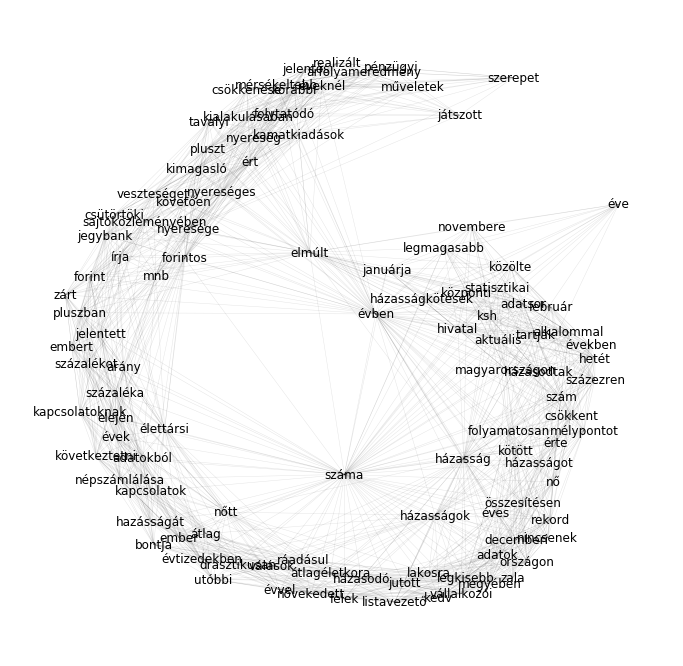

In [28]:
%pylab inline
textacy.viz.draw_semantic_network(
    textacy.keyterms.terms_to_semantic_network(
        [tok for tok in doc[:300] if not tok.is_stop and tok.pos_ in ["NOUN", "PROPN", "ADJ", "VERB"] and tok.is_alpha],
        normalize='lower',
        edge_weighting='cooc_freq',
        window_width=15
    )
)

### Word context lookup

In [29]:
from textacy.text_utils import keyword_in_context

keyword_in_context(doc.text, "korrupció", window_width=50)

, hogy a közbeszerzési eljárás módja nem növeli a  korrupció s kockázatot, a pályázáshoz szükséges referenciák 
ti szektorra jellemző. Még az ÁSZ szerint is több  korrupció  várható az olimpiától A kormány a korrupciós váda
 több korrupció várható az olimpiától A kormány a  korrupció s vádak miatt nagy dérrel-dúrral felkérte a Domoko
k szakmai támogatást" az olimpia miatti esetleges  korrupció s kockázatok miatt az olimpiás előkészületekhez. N
az átlagos nagy projektnél is magasabb az olimpia  korrupció s kockázata. Ha nő a korrupciós kockázat, akkor pe
magasabb az olimpia korrupciós kockázata. Ha nő a  korrupció s kockázat, akkor pedig jellemzően nő a korrupció 
 korrupciós kockázat, akkor pedig jellemzően nő a  korrupció  valószínűsége is. Pedig a tanulmányban nem is aka
lmányban nem is akartak kitérni minden lehetséges  korrupció s kockázatra. Itt egyebek mellett az esemény kivét
zemélyes kapcsolatrendszere potenciális forrása a  korrupció s lehetőségeknek A komplex projekteknél kön

## Word clouds

Scoring terms

In [30]:
import math
from collections import Counter 
words = [tok for tok in doc if tok.is_alpha and not tok.is_stop and tok.tag_ in ["NOUN", "VERB", "ADJ", "PROPN"]]
word_probs = {tok.text.lower(): tok.prob for tok in words}

freqs = Counter(tok.text for tok in words)
word_scores = {tok: freqs[tok] *  -word_probs[tok] for tok, prob in word_probs.items()}

In [31]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color="white", max_words=30, scale=1.5).generate_from_frequencies(freqs)
image = wordcloud.to_image()
image.save("./wordcloud.png")

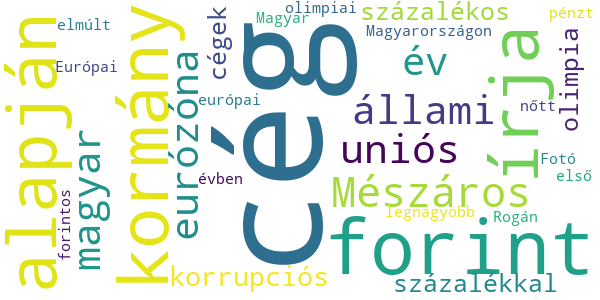

In [32]:
from IPython.display import Image 
Image(filename='./wordcloud.png')

### Popular projects built on top of spaCy

* [textacy](https://github.com/chartbeat-labs/textacy) - higher-level NLP built on spaCy
* [scattertext](https://github.com/JasonKessler/scattertext) - Beautiful visualizations of how language differs among document types
* [displaCy](https://github.com/explosion/displacy) - NLP visualiser for the modern web
* [Rasa NLU](https://github.com/RasaHQ/rasa_nlu) - a tool for intent classification and entity extraction
* [W.I.L.L](https://github.com/ironman5366/W.I.L.L) - personal assistant